<a href="https://colab.research.google.com/github/Kim-Yeonjoo/DeepLearning/blob/main/2_%ED%85%90%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스칼라(랭크-0 텐서)
  > 하나의 숫자만 담고 있음

In [1]:
import numpy as np

x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

# 벡터(랭크-1 텐서)
  > 하나의 축

In [3]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [4]:
x.ndim

1

# 행렬(랭크-2 텐서)
  > 행, 열


In [9]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.ndim

2

# 랭크-3 텐서와 더 높은 랭크의 텐서

In [10]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80 ,4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80 ,4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80 ,4, 36, 2]]])
x.ndim

3

# 텐서 핵심 속성
1. 축의 개수(랭크)
  > ndim
2. 크기
  > 튜플
3. 데이터 타입
  > dtype

In [11]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
train_images.ndim

3

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
train_images.dtype

dtype('uint8')

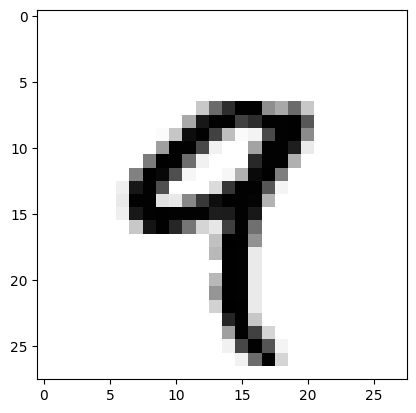

In [15]:
# 이미지 출력
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [16]:
train_labels[4]

9

# 넘파이로 텐서 조작하기
  > 슬라이싱

In [17]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [18]:
# 시작, 마지막 인덱스 지정
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [20]:
# 인덱스 사이 선택 - 14 x 14 픽셀 선택
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [21]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

# 배치 데이터
  > 인덱스 0 : 샘플 축  
  > = 배치 축 또는 배치 차원

In [22]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [23]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [24]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

# 텐서의 실제 사례
1. 벡터 데이터: (samples, features)
  > 10만명의 나이, 성별, 소득 -> (100000, 3)  

2. 시계열 데이터 또는 시퀀스 데이터: (samples, timesteps, features)  
  > 시간이 중요할때,    
  > 1분 마다 현재 주식 가격 & 지난 1분 동안 최고, 최소 가격 저장    
    => (390, 3) 하루 거래 시간 390분       
    => (250, 390, 3) 250일치 데이터    

3. 이미지: (samples, height, width, channels) or (samples, channels, height, width)  
  > (128, 256, 256, 1) 256 x 256 크기 이미지, 128개 배치  
  
4. 동영상: (samples, frames, height, width, channels) or (samples, frames, channels, height, width)  
  > (4, 240, 144, 256, 3) 144 x256 비디오, 초당 4 프레임 -> 샘플링 240프레임, 클립 4개  


# 텐서 연산

In [29]:
def native_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
      for j in range(x.shape[1]):
          x[i, j] = max(x[i, j], 0)
  return x

In [30]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [32]:
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"Took: ", (time.time() - t0))

Took:  0.009834766387939453


In [33]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = native_relu(x)
print(f"Took: ", (time.time() - t0))

Took:  2.1719632148742676


# 브로드캐스팅
  > 크기가 다른 두 텐서 더 할때  
  > np.maximum

In [34]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [35]:
y = np.expand_dims(y, axis=0)

In [36]:
Y = np.concatenate([y] * 32, axis=0)

In [37]:
def native_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
      for j in range(x.shape[1]):
          x[i, j] += y[j]
    return x

In [38]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)    # 브로드케스팅

In [39]:
z.shape

(64, 3, 32, 10)

# 텐서 곱셈
  > np.dot

In [40]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [41]:
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
      z += x[i] * y[i]
  return z

In [42]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [43]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [44]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return

# 텐서 크기 변환

In [46]:
train_images = train_images.reshape((60000, 28 * 28))

In [47]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [48]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [49]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [50]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)